In [2]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('house_sell_data_models.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,type_vente,code_departement,code_commune,prix_vente,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,prix_m²,taxe_fonciere,...,vitrage,parking,baignoire,balcon,jardin,garage,dressing,approximite_metro,bureau,terrasse
0,1,93,93057,359000,4,2,75,222,4787,-1,...,0,0,0,0,0,1,0,0,0,0
1,0,75,75056,750000,3,2,73,0,10274,1155,...,0,1,1,1,0,0,1,1,0,0
2,1,92,92050,550000,3,2,80,209,6875,-1,...,0,0,0,0,1,0,0,0,0,0
3,0,75,75056,518000,2,1,44,0,0,511,...,1,0,0,0,0,0,1,1,0,0
4,0,94,94002,260000,2,1,43,0,6047,-1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,92,92026,525000,3,2,70,0,7500,850,...,1,1,0,1,1,0,0,0,0,0
258,1,93,93062,376000,3,2,63,0,0,950,...,1,0,0,0,1,0,0,0,0,0
259,0,95,95252,153000,0,0,23,0,6652,-1,...,0,1,0,0,1,0,0,0,0,1
260,0,94,94015,310000,3,2,68,0,4559,-1,...,1,1,0,0,0,0,0,0,0,0


In [4]:
df.shape

(262, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   type_vente           262 non-null    int64
 1   code_departement     262 non-null    int64
 2   code_commune         262 non-null    int64
 3   prix_vente           262 non-null    int64
 4   nb_pieces            262 non-null    int64
 5   nb_chambres          262 non-null    int64
 6   sbien_m²             262 non-null    int64
 7   sterrain_m²          262 non-null    int64
 8   prix_m²              262 non-null    int64
 9   taxe_fonciere        262 non-null    int64
 10  cuisine_equipee      262 non-null    int64
 11  chauffage_collectif  262 non-null    int64
 12  sejour_cuisine       262 non-null    int64
 13  salle_equipee        262 non-null    int64
 14  ascenseur            262 non-null    int64
 15  cave                 262 non-null    int64
 16  chauffage            262 n

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
type_vente,262.0,0.236641,4.258336e-01,0.0,0.0,0.0,0.00,1.0
code_departement,262.0,85.309160,8.560794e+00,75.0,75.0,91.0,93.00,95.0
code_commune,262.0,85417.927481,8.544219e+03,75056.0,75056.0,91457.0,93048.00,95563.0
prix_vente,262.0,533059.732824,3.628307e+05,66000.0,301750.0,460000.0,660000.00,3790000.0
nb_pieces,262.0,3.679389,2.220653e+00,0.0,2.0,3.0,5.00,12.0
nb_chambres,262.0,2.381679,1.568160e+00,0.0,1.0,2.0,3.00,7.0
sbien_m²,262.0,86.297710,6.138094e+01,6.0,48.5,70.0,99.75,447.0
sterrain_m²,262.0,78.003817,1.803795e+02,0.0,0.0,0.0,0.00,942.0
prix_m²,262.0,5645.297710,4.067421e+03,0.0,2961.0,5397.0,8500.00,18293.0
taxe_fonciere,262.0,170094.194656,1.769922e+06,-1.0,-1.0,-1.0,315.50,20212018.0


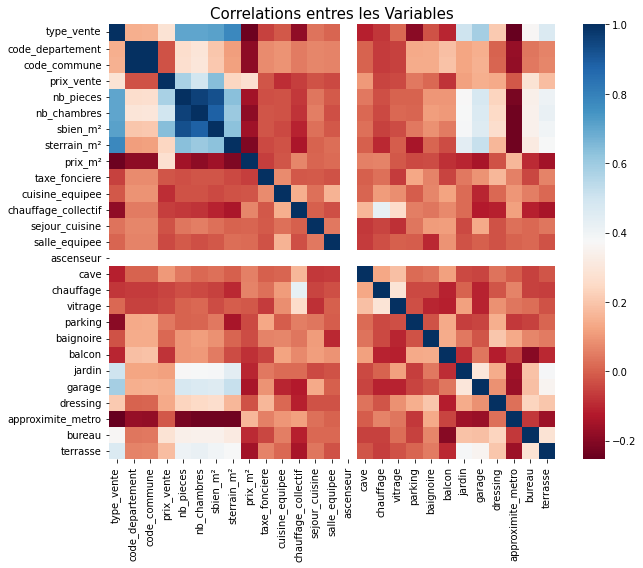

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations entres les Variables", size=15)
plt.show()

In [8]:
df['nb_chambres']

0      2
1      2
2      2
3      1
4      1
      ..
257    2
258    2
259    0
260    2
261    1
Name: nb_chambres, Length: 262, dtype: int64

In [9]:
df

,type_vente,code_departement,code_commune,prix_vente,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,prix_m²,taxe_fonciere,...,vitrage,parking,baignoire,balcon,jardin,garage,dressing,approximite_metro,bureau,terrasse
0,1,93,93057,359000,4,2,75,222,4787,-1,...,0,0,0,0,0,1,0,0,0,0
1,0,75,75056,750000,3,2,73,0,10274,1155,...,0,1,1,1,0,0,1,1,0,0
2,1,92,92050,550000,3,2,80,209,6875,-1,...,0,0,0,0,1,0,0,0,0,0
3,0,75,75056,518000,2,1,44,0,0,511,...,1,0,0,0,0,0,1,1,0,0
4,0,94,94002,260000,2,1,43,0,6047,-1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,92,92026,525000,3,2,70,0,7500,850,...,1,1,0,1,1,0,0,0,0,0
258,1,93,93062,376000,3,2,63,0,0,950,...,1,0,0,0,1,0,0,0,0,0
259,0,95,95252,153000,0,0,23,0,6652,-1,...,0,1,0,0,1,0,0,0,0,1
260,0,94,94015,310000,3,2,68,0,4559,-1,...,1,1,0,0,0,0,0,0,0,0


In [10]:
dt = df[['prix_vente','nb_pieces', 'nb_chambres', 'sbien_m²', 'sterrain_m²', 'prix_m²', 'taxe_fonciere']]
df.columns

Index(['type_vente', 'code_departement', 'code_commune', 'prix_vente',
       'nb_pieces', 'nb_chambres', 'sbien_m²', 'sterrain_m²', 'prix_m²',
       'taxe_fonciere', 'cuisine_equipee', 'chauffage_collectif',
       'sejour_cuisine', 'salle_equipee', 'ascenseur', 'cave', 'chauffage',
       'vitrage', 'parking', 'baignoire', 'balcon', 'jardin', 'garage',
       'dressing', 'approximite_metro', 'bureau', 'terrasse'],
      dtype='object')

In [11]:
important_num_cols = list(dt.corr()["prix_vente"][(dt.corr()["prix_vente"]>0.3) | (dt.corr()["prix_vente"]<-0.30)].index)
cat_cols = ['type_vente','code_commune','cuisine_equipee', 'chauffage_collectif', 'sejour_cuisine', 'salle_equipee','ascenseur', 'garage', 'cave', 'chauffage', 'vitrage', 'parking','baignoire', 'balcon', 'jardin', 'dressing', 'bureau','approximite_metro', 'terrasse']
important_cols = important_num_cols + cat_cols

data = df[important_cols]

In [12]:
data.isnull().sum()

prix_vente             0
nb_pieces              0
nb_chambres            0
sbien_m²               0
type_vente             0
code_commune           0
cuisine_equipee        0
chauffage_collectif    0
sejour_cuisine         0
salle_equipee          0
ascenseur              0
garage                 0
cave                   0
chauffage              0
vitrage                0
parking                0
baignoire              0
balcon                 0
jardin                 0
dressing               0
bureau                 0
approximite_metro      0
terrasse               0
dtype: int64

In [13]:
data


,prix_vente,nb_pieces,nb_chambres,sbien_m²,type_vente,code_commune,cuisine_equipee,chauffage_collectif,sejour_cuisine,salle_equipee,...,chauffage,vitrage,parking,baignoire,balcon,jardin,dressing,bureau,approximite_metro,terrasse
0,359000,4,2,75,1,93057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750000,3,2,73,0,75056,0,0,0,0,...,0,0,1,1,1,0,1,0,1,0
2,550000,3,2,80,1,92050,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,518000,2,1,44,0,75056,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
4,260000,2,1,43,0,94002,0,1,0,0,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,525000,3,2,70,0,92026,0,0,0,0,...,1,1,1,0,1,1,0,0,0,0
258,376000,3,2,63,1,93062,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
259,153000,0,0,23,0,95252,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
260,310000,3,2,68,0,94015,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


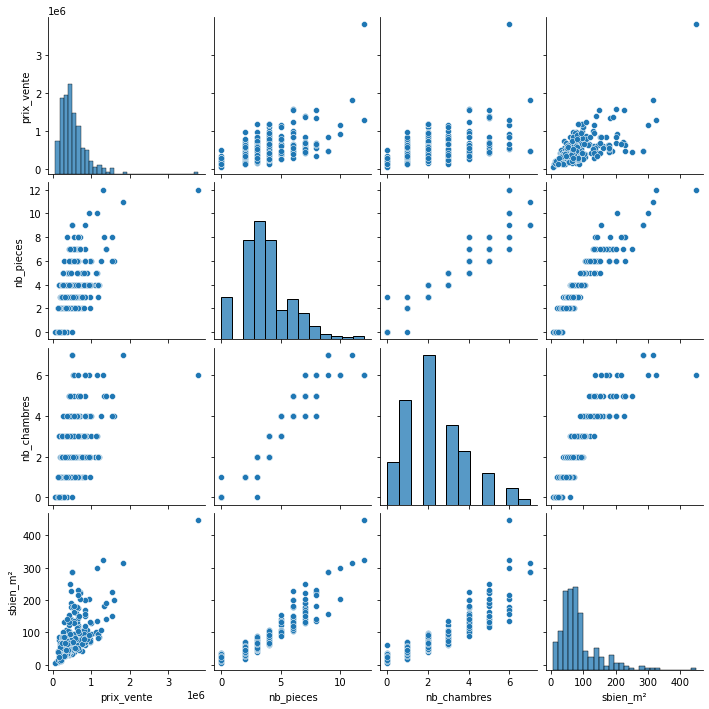

In [14]:
sns.pairplot(data[important_num_cols])

<Figure size 720x576 with 0 Axes>

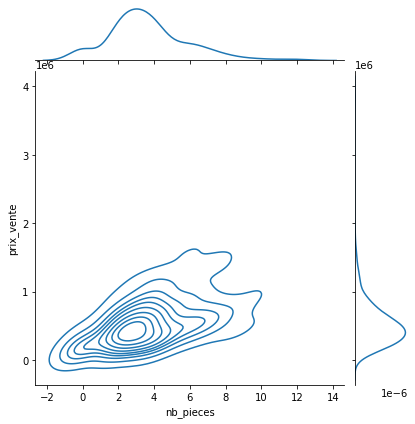

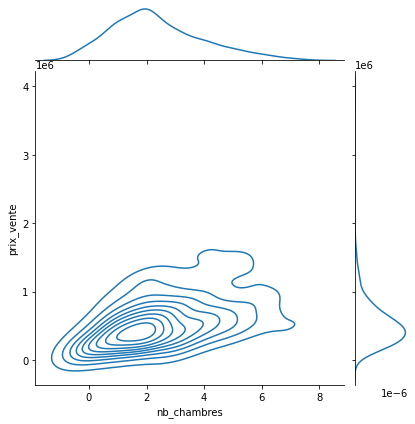

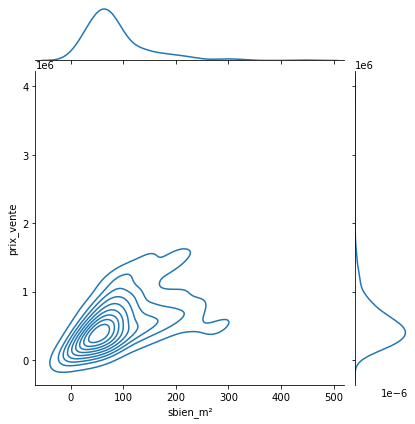

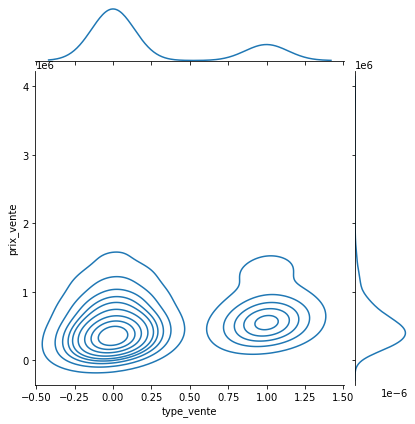

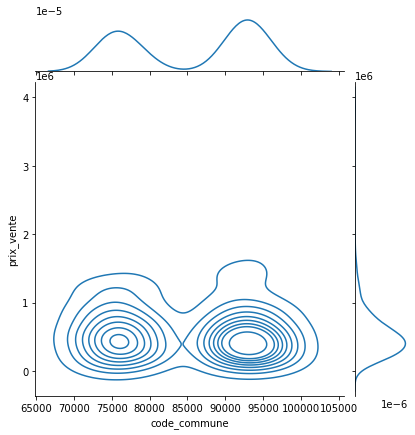

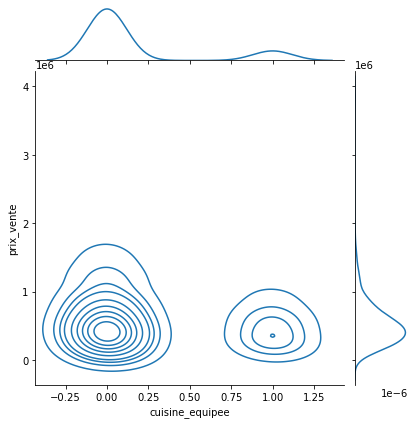

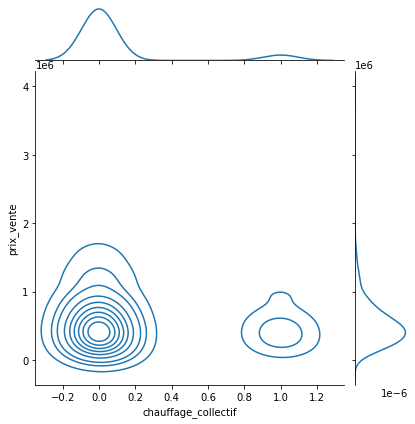

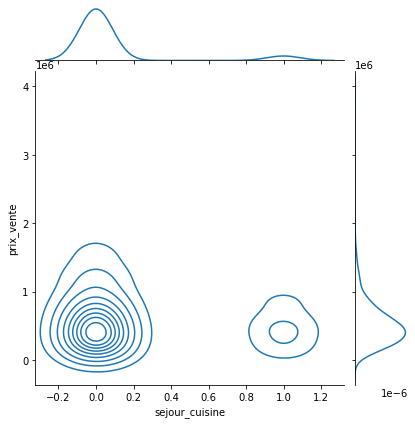

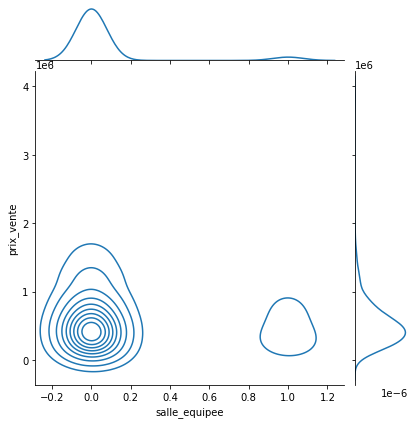

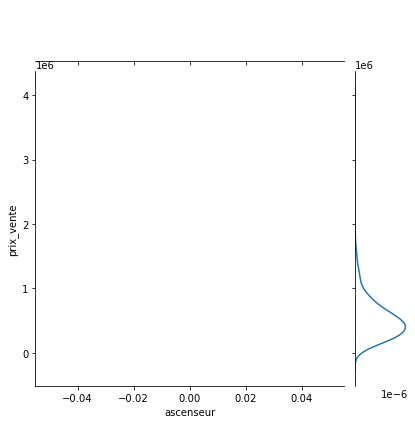

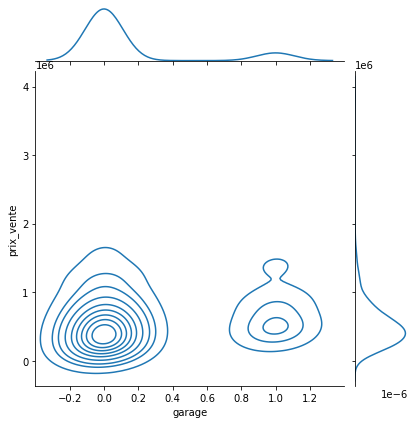

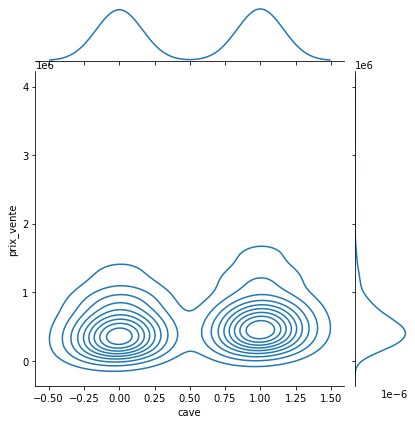

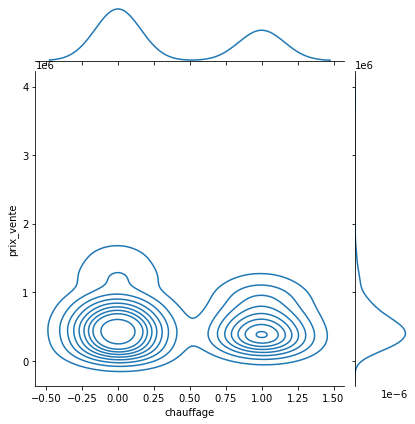

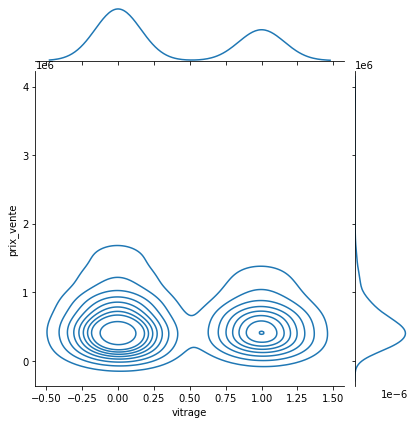

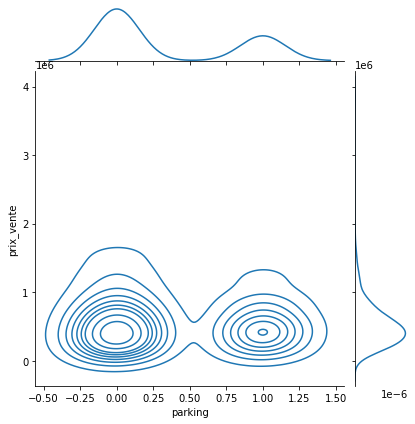

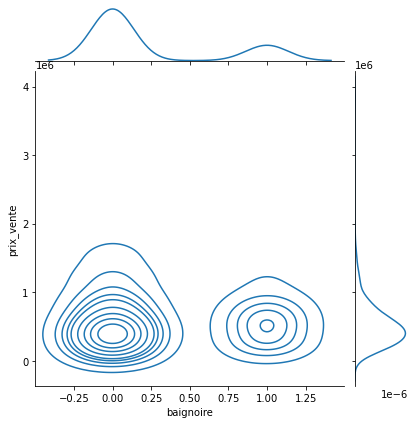

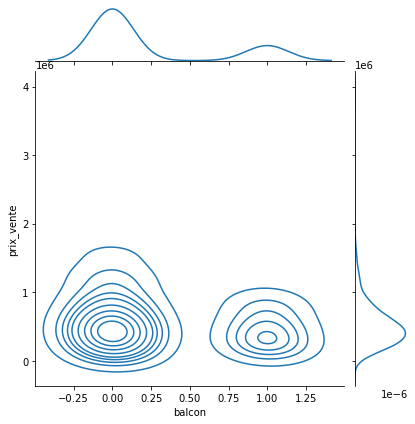

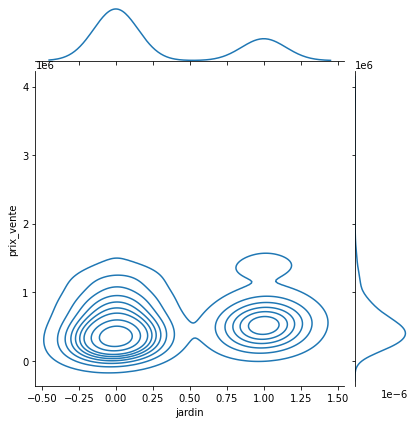

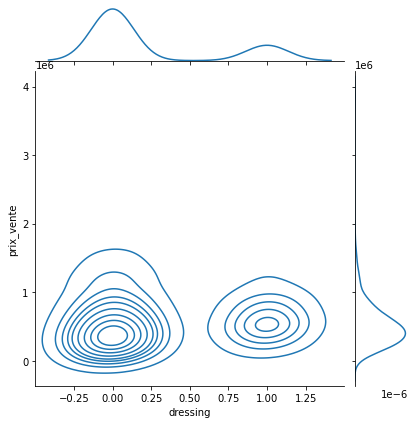

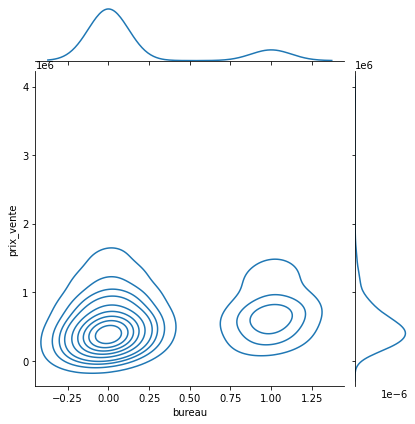

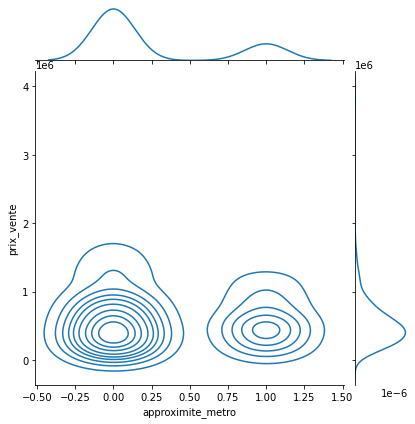

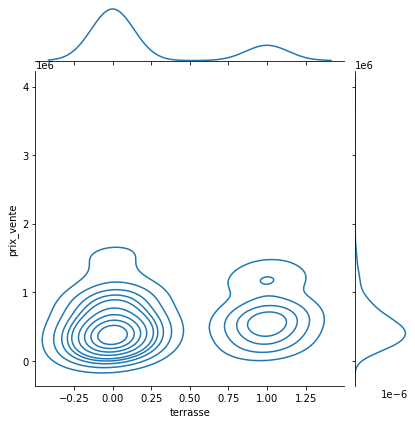

In [15]:
plt.figure(figsize=(10,8))
for i in data.columns:
    if i!="prix_vente":
        sns.jointplot(x=data[i], y=data["prix_vente"], kind="kde")

plt.show()

In [16]:
X = df.drop("prix_vente", axis=1)
y = df["prix_vente"]

In [17]:
######standariser les donées

In [18]:
important_num_cols.remove("prix_vente")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [19]:
X.head()

,type_vente,code_departement,code_commune,nb_pieces,nb_chambres,sbien_m²,sterrain_m²,prix_m²,taxe_fonciere,cuisine_equipee,...,vitrage,parking,baignoire,balcon,jardin,garage,dressing,approximite_metro,bureau,terrasse
0,1,93,93057,0.144653,-0.243859,-0.184411,222,4787,-1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,75,75056,-0.306527,-0.243859,-0.217057,0,10274,1155,0,...,0,1,1,1,0,0,1,1,0,0
2,1,92,92050,-0.306527,-0.243859,-0.102797,209,6875,-1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,75,75056,-0.757707,-0.882769,-0.690421,0,0,511,0,...,1,0,0,0,0,0,1,1,0,0
4,0,94,94002,-0.757707,-0.882769,-0.706743,0,6047,-1,0,...,1,0,1,0,0,0,0,1,0,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


In [22]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# linear regression

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 181592.84922243954
MSE: 91771587871.48611
RMSE: 302938.25752368435
R2 Score: 0.6630281807276563
------------------------------
RMSE Cross-Validation: 239851.43609221576


# Ridge Regression

In [24]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 181640.30286392773
MSE: 95132315981.17424
RMSE: 308435.2703261646
R2 Score: 0.6506880797065517
------------------------------
RMSE Cross-Validation: 237975.59981972043


# Lasso Regression

In [25]:

lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 185574.24406887707
MSE: 95621392533.72415
RMSE: 309227.0889390581
R2 Score: 0.6488922622918311
------------------------------
RMSE Cross-Validation: 243616.44642294463


In [26]:
#Elastic Net
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 199045.114264338
MSE: 155319388914.82947
RMSE: 394105.8092883553
R2 Score: 0.429689969795537
------------------------------
RMSE Cross-Validation: 251658.73245784413


In [27]:
#Support Vector Machines
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 266956.73604706425
MSE: 289335991812.57196
RMSE: 537899.6112775803
R2 Score: -0.06239935260337193
------------------------------
RMSE Cross-Validation: 348039.9041437685


In [28]:
#Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 120762.35849056604
MSE: 113203485440.8868
RMSE: 336457.2564842179
R2 Score: 0.5843333942264917
------------------------------
RMSE Cross-Validation: 181074.01193880342


In [29]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,120762.358491,113203485440.886795,336457.256484,0.584333,181074.011939
1,Ridge,181640.302864,95132315981.17424,308435.270326,0.650688,237975.59982
0,LinearRegression,181592.849222,91771587871.486115,302938.257524,0.663028,239851.436092
2,Lasso,185574.244069,95621392533.724152,309227.088939,0.648892,243616.446423
3,ElasticNet,199045.114264,155319388914.829468,394105.809288,0.42969,251658.732458
4,SVR,266956.736047,289335991812.57196,537899.611278,-0.062399,348039.904144


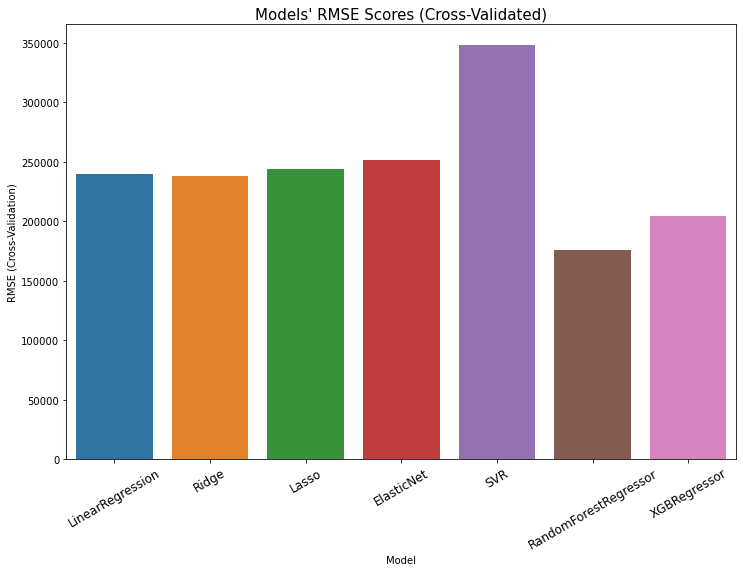

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()